In [40]:
%store -r df

 # Unsupervised Classification

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

# Get Vader data for sentiment analysis
import nltk
#nltk.download('vader_lexicon') 

# dictionary of colours for making nice plots later
COLOURS = {'after': '#E91D0E', 'before': '#00A6EF'}

%matplotlib inline



In [42]:
import seaborn as sns

def scatter(x, colors):
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    ax.scatter(x[(colors=="o"),0], x[(colors=="o"),1], c=COLOURS['after'], label='neutral', alpha=0.5)
    if df.loc[df['Sentiment'] == 'n', ['Citation_Text', 'Sentiment']].shape[0] != 0:
        ax.scatter(x[(colors=="n"),0], x[(colors=="n"),1], c=COLOURS['before'], label='negative', alpha=0.5)
    elif df.loc[df['Sentiment'] == 'p', ['Citation_Text', 'Sentiment']].shape[0] != 0:
        ax.scatter(x[(colors=="p"),0], x[(colors=="p"),1], c=COLOURS['before'], label='positive', alpha=0.5)

        ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    plt.legend()
    
    return f, ax



#sample_before = df.loc[df['Sentiment'] == 'o', ['Citation_Text', 'Sentiment']].sample(280)
#sample_after = df.loc[df['Sentiment'] == 'n', ['Citation_Text', 'Sentiment']].sample(280)


sample_before = df.loc[df['Sentiment'] == 'o', ['Citation_Text', 'Sentiment']].sample(276)
if df.loc[df['Sentiment'] == 'n', ['Citation_Text', 'Sentiment']].shape[0] != 0:
    sample_after = df.loc[df['Sentiment'] == 'n', ['Citation_Text', 'Sentiment']].sample(276)
elif df.loc[df['Sentiment'] == 'p', ['Citation_Text', 'Sentiment']].shape[0] != 0:
    sample_after = df.loc[df['Sentiment'] == 'p', ['Citation_Text', 'Sentiment']].sample(276)


sample = sample_before.append(sample_after)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_vectors = tfidf_vectorizer.fit_transform(sample['Citation_Text'])

In [43]:
sample_after.shape

(280, 2)

# PCA

(<matplotlib.figure.Figure at 0x7fe65d317828>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe65d2ba080>)

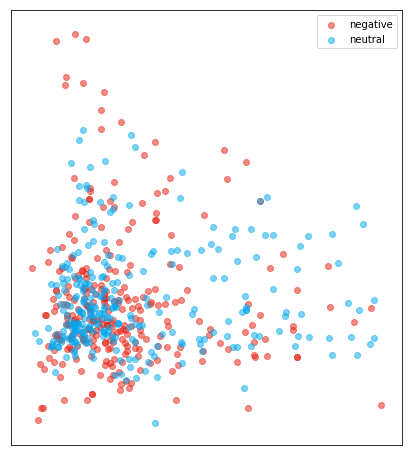

In [38]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(tfidf_vectors.toarray())

pca_vectors = pca.transform(tfidf_vectors.toarray())

scatter(pca_vectors, sample['Sentiment'])

# t-SNE

(<matplotlib.figure.Figure at 0x7fe65d265eb8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe65c562fd0>)

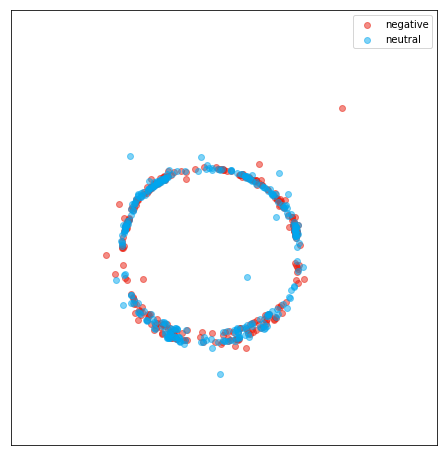

In [39]:
from sklearn.manifold import TSNE

# we have suggested some parameters below, feel free to experiment
tsne = TSNE(perplexity = 800, random_state = 42)

tsne_vectors = tsne.fit_transform(tfidf_vectors.toarray())

scatter(tsne_vectors, sample["Sentiment"])